<div style="display: flex; background-color: RGB(72,209,204);" >
<h1 style="margin: auto; padding: 30px; ">Brief Book Business </h1>
</div>

<div style="display: flex; background-color: RGB(100,149,237);" >
<h1 style="margin: auto; padding: 30px; ">Mission 1 </h1>
</div>

In [81]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

import scipy.stats as stats
from scipy.stats import zscore

In [82]:
#lecture fichier csv
clients = pd.read_csv('clients.csv')
ventes = pd.read_csv('ventes.csv')
produits = pd.read_csv('produits.csv')

In [83]:
clients.head()#permet de voir les 5 premieres valeurs

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [84]:
ventes.head()

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242


In [85]:
produits.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [86]:
clients.isnull().sum()#isnull permet de voir si il ya des valeurs null et sum permet de les regroupers par colonnes

client_id    0
sex          0
birth        0
dtype: int64

In [87]:
clients.isnull().sum().sort_values(ascending=False)/len(clients)
#le sort values permet d'extraire une valeur manquante(NaN)

client_id    0.0
sex          0.0
birth        0.0
dtype: float64

In [88]:
ventes.isnull().sum()

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

In [89]:
ventes.isnull().sum().sort_values(ascending=False)/len(ventes)

id_prod       0.0
date          0.0
session_id    0.0
client_id     0.0
dtype: float64

In [90]:
produits.isnull().sum()

id_prod    0
price      0
categ      0
dtype: int64

In [91]:
produits.isnull().sum().sort_values(ascending=False)/len(produits)

id_prod    0.0
price      0.0
categ      0.0
dtype: float64

<div style="display: flex; background-color: RGB(100,149,237);" >
<h1 style="margin: auto; padding: 30px; ">Mission 2 </h1>
</div>

In [92]:
#std = ecart type
#25%,50%,75% =Q1,Q3 (L’écart interquartile)
ecart  = produits.describe()
ecart

,price,categ
count,3287.000000,3287.000000
mean,21.856641,0.370246
std,29.847908,0.615387
min,-1.000000,0.000000
25%,6.990000,0.000000
50%,13.060000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


C:\Users\utilisateur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

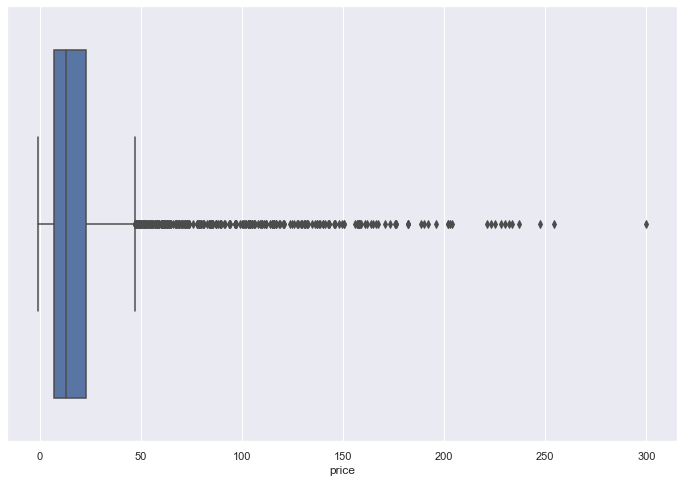

In [93]:
#boite a moustache
sns.boxplot(produits["price"])


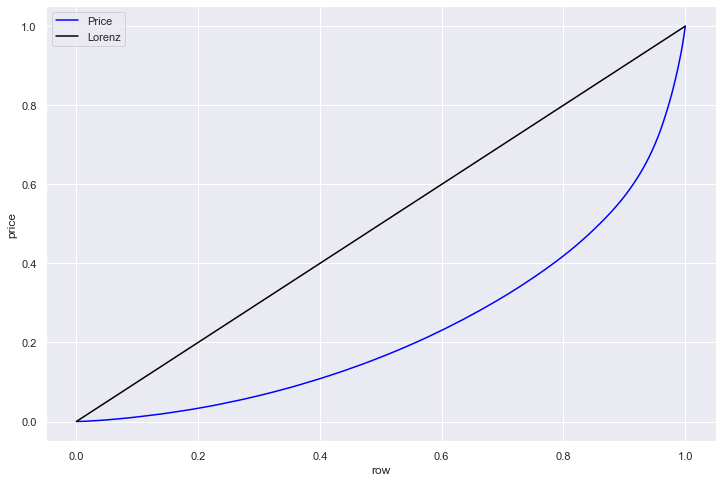

Le coefficient de Gini est de 0.5317286330993778


In [94]:
#courbe de lorenz et indice de gini
#prendre price dans produit ,enlever les valeur negatif , tri croisant avec un sort_values
produits_tri = produits[produits['price'] > 0].sort_values(by='price')
produits_tri['row'] = np.arange(1, len(produits_tri)+1)
x = produits_tri['row']
y = produits_tri['price'].cumsum()

plt.plot(x/max(x), y/max(y), 'blue', label="Price")
plt.plot(x/max(x), x/max(x), 'black', label="Lorenz")
plt.legend()
plt.xlabel('row')
plt.ylabel('price')
plt.show()

def gini(x):
    total = 0
    for i, xi in enumerate(x[:-1], 1):
        total += np.sum(np.abs(xi - x[i:]))
    return total / (len(x)**2 * np.mean(x))

print('Le coefficient de Gini est de ' + str(gini(produits_tri['price'])))

In [95]:
#merge des tables entre elle
df_client_ventes = ventes.merge(clients, how='left', left_on='client_id', right_on='client_id')
df_client_ventes

,id_prod,date,session_id,client_id,sex,birth
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,f,1977
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,f,2000
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,f,1979
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,m,1963
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,f,1980
...,...,...,...,...,...,...
337011,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454,m,1969
337012,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268,m,1991
337013,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,f,1968
337014,2_227,2021-10-30 16:50:15.997750,s_112349,c_5,f,1994


In [96]:
df_general = df_client_ventes.merge(produits, how='left', left_on='id_prod', right_on='id_prod')
df_general

,id_prod,date,session_id,client_id,sex,birth,price,categ
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,f,1977,4.99,0.0
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,f,2000,65.75,2.0
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,f,1979,10.71,1.0
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,m,1963,4.20,0.0
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,f,1980,8.99,0.0
...,...,...,...,...,...,...,...,...
337011,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454,m,1969,31.99,1.0
337012,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268,m,1991,22.99,0.0
337013,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,f,1968,11.03,0.0
337014,2_227,2021-10-30 16:50:15.997750,s_112349,c_5,f,1994,50.99,2.0


In [97]:
#Faire l'age et crée la colonne age
df_general['year'] =df_general.apply(lambda row: (row['date'][:4]), axis = 1)
df_general['month'] =df_general.apply(lambda row: (row['date'][5:7]), axis = 1)
df_general['day'] =df_general.apply(lambda row: (row['date'][8:10]), axis = 1)
df_general

,id_prod,date,session_id,client_id,sex,birth,price,categ,year,month,day
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,f,1977,4.99,0.0,2021,04,10
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,f,2000,65.75,2.0,2022,02,03
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,f,1979,10.71,1.0,2021,09,23
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,m,1963,4.20,0.0,2021,10,17
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,f,1980,8.99,0.0,2021,07,17
...,...,...,...,...,...,...,...,...,...,...,...
337011,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454,m,1969,31.99,1.0,2021,05,28
337012,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268,m,1991,22.99,0.0,2021,06,19
337013,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,f,1968,11.03,0.0,2021,03,16
337014,2_227,2021-10-30 16:50:15.997750,s_112349,c_5,f,1994,50.99,2.0,2021,10,30


In [98]:
df_general.query("price >= 0", inplace = True)
df_general

,id_prod,date,session_id,client_id,sex,birth,price,categ,year,month,day
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,f,1977,4.99,0.0,2021,04,10
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,f,2000,65.75,2.0,2022,02,03
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,f,1979,10.71,1.0,2021,09,23
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,m,1963,4.20,0.0,2021,10,17
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,f,1980,8.99,0.0,2021,07,17
...,...,...,...,...,...,...,...,...,...,...,...
337011,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454,m,1969,31.99,1.0,2021,05,28
337012,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268,m,1991,22.99,0.0,2021,06,19
337013,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,f,1968,11.03,0.0,2021,03,16
337014,2_227,2021-10-30 16:50:15.997750,s_112349,c_5,f,1994,50.99,2.0,2021,10,30


In [99]:
df_general['age'] = 2022 - df_general['birth']
df_general

,id_prod,date,session_id,client_id,sex,birth,price,categ,year,month,day,age
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,f,1977,4.99,0.0,2021,04,10,45
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,f,2000,65.75,2.0,2022,02,03,22
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,f,1979,10.71,1.0,2021,09,23,43
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,m,1963,4.20,0.0,2021,10,17,59
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,f,1980,8.99,0.0,2021,07,17,42
...,...,...,...,...,...,...,...,...,...,...,...,...
337011,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454,m,1969,31.99,1.0,2021,05,28,53
337012,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268,m,1991,22.99,0.0,2021,06,19,31
337013,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,f,1968,11.03,0.0,2021,03,16,54
337014,2_227,2021-10-30 16:50:15.997750,s_112349,c_5,f,1994,50.99,2.0,2021,10,30,28


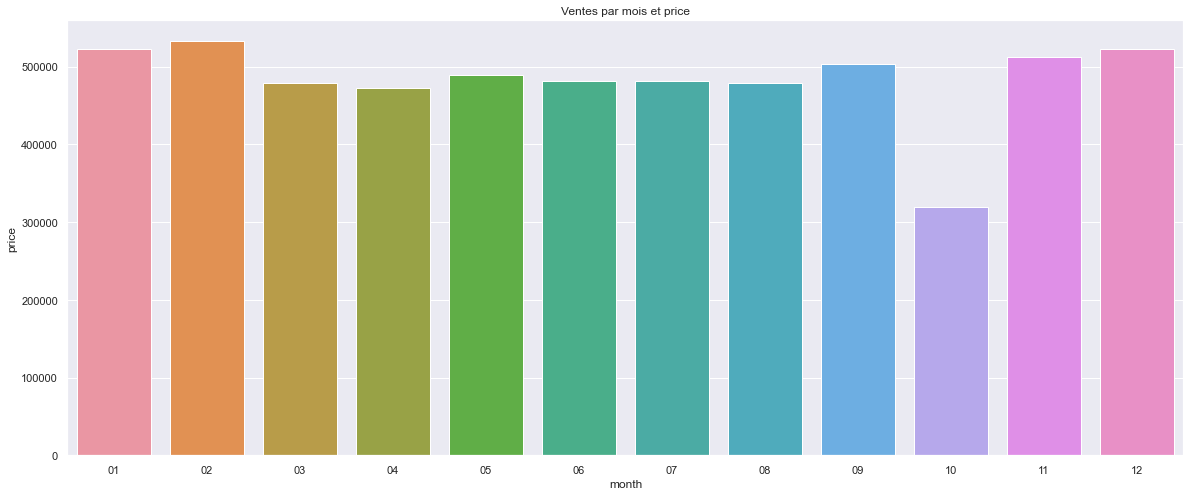

In [100]:
#histogramme
#sns.histplot(data=df_general, x="month")
df_moy = df_general.groupby(['month'])['price'].sum().reset_index()
plt.figure(figsize=(20,8))
sns.barplot(x=df_moy['month'], y=df_moy['price'])
plt.title('Ventes par mois et price')
plt.show()

In [101]:
#faire une serie temporelle


In [102]:
#analyse bivariées

<div style="display: flex; background-color: RGB(100,149,237);" >
<h1 style="margin: auto; padding: 30px; ">Mission 3 </h1>
</div>

In [103]:
#Y a-t-il une corrélation entre le sexe des clients et les catégories de produits achetés ?
#df_general.corr()
df_general['sex']= df_general['sex'].replace(['f','m'],[0,1])
df_general

,id_prod,date,session_id,client_id,sex,birth,price,categ,year,month,day,age
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,0,1977,4.99,0.0,2021,04,10,45
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,0,2000,65.75,2.0,2022,02,03,22
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,0,1979,10.71,1.0,2021,09,23,43
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,1,1963,4.20,0.0,2021,10,17,59
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,0,1980,8.99,0.0,2021,07,17,42
...,...,...,...,...,...,...,...,...,...,...,...,...
337011,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454,1,1969,31.99,1.0,2021,05,28,53
337012,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268,1,1991,22.99,0.0,2021,06,19,31
337013,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,0,1968,11.03,0.0,2021,03,16,54
337014,2_227,2021-10-30 16:50:15.997750,s_112349,c_5,0,1994,50.99,2.0,2021,10,30,28


In [104]:
df_general.corr()

,sex,birth,price,categ,age
sex,1.000000,0.041264,0.008210,0.000689,-0.041264
birth,0.041264,1.000000,0.211529,0.098612,-1.000000
price,0.008210,0.211529,1.000000,0.673359,-0.211529
categ,0.000689,0.098612,0.673359,1.000000,-0.098612
age,-0.041264,-1.000000,-0.211529,-0.098612,1.000000


On remarque qu'il n'y a pas de forte correlation entre le sexe et la categorie = 0.000689

In [105]:
#Y a-t-il une corrélation entre lâge des clients et Le montant total des achats
df_tot_achat = df_general.groupby("age")['price'].sum().reset_index(name='tot_achat')
df_tot_achat

,age,tot_achat
0,18,295387.98
1,19,88461.39
2,20,89910.02
3,21,84881.48
4,22,80099.92
...,...,...
71,89,2632.02
72,90,2586.09
73,91,1432.92
74,92,2028.35


<AxesSubplot:xlabel='age', ylabel='tot_achat'>

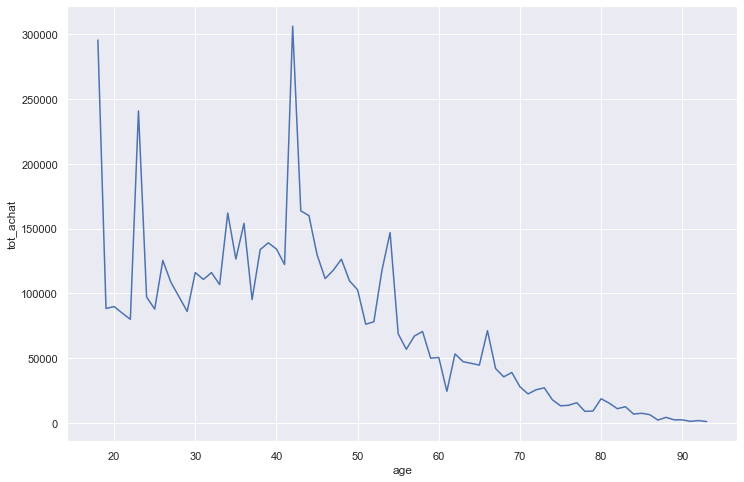

In [106]:
sns.lineplot(data=df_tot_achat, y="tot_achat", x="age")

In [107]:
#La fréquence d’achat (ie. nombre d'achats par mois par exemple) 
df_frequence = df_general.groupby(["month","age"])['id_prod'].count().reset_index(name='freq_achat')
df_frequence

,month,age,freq_achat
0,01,18,693
1,01,19,191
2,01,20,182
3,01,21,177
4,01,22,224
...,...,...,...
907,12,89,8
908,12,90,8
909,12,91,4
910,12,92,16


<AxesSubplot:xlabel='month', ylabel='age'>

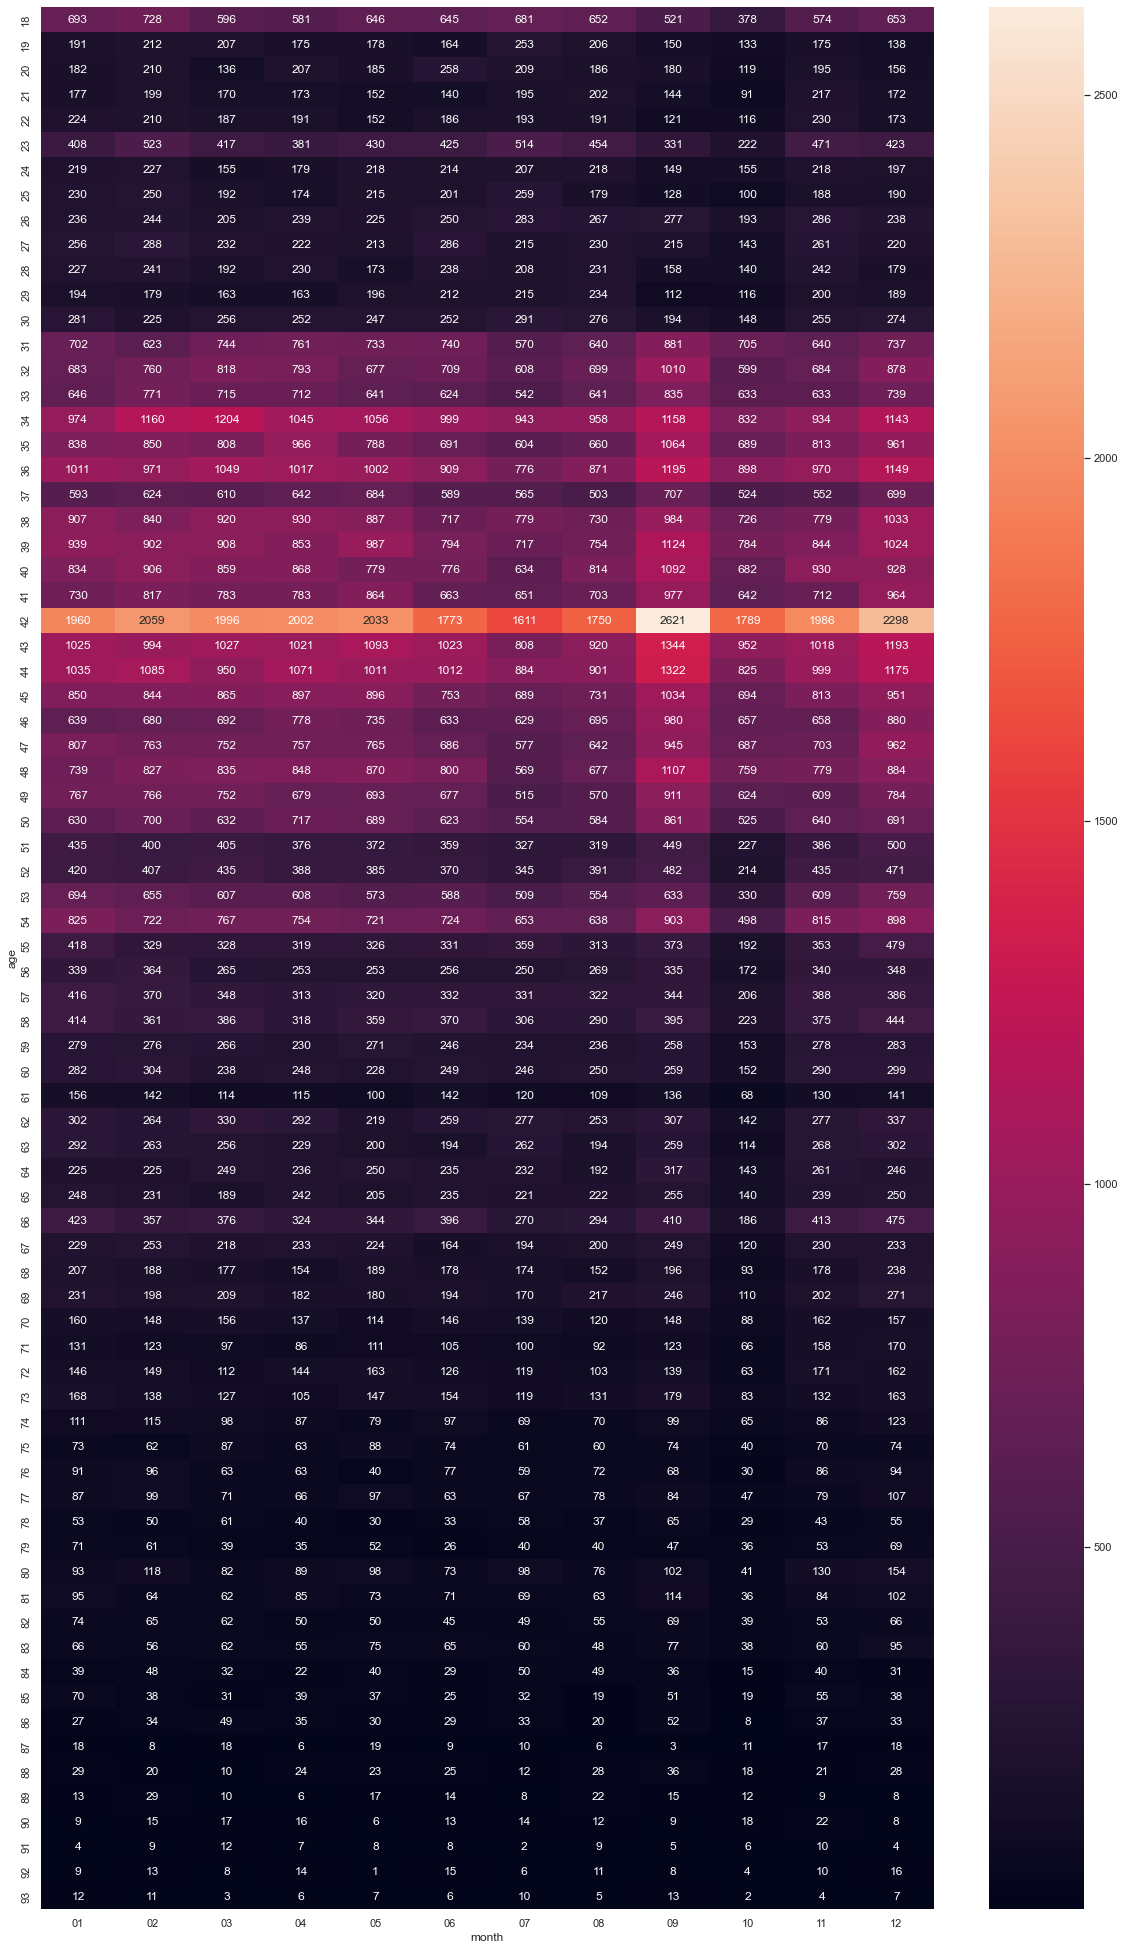

In [108]:
fli =df_frequence.pivot(index = 'age',columns = 'month',values = 'freq_achat')
sns.set(rc = {'figure.figsize':(20,35)})
sns.heatmap(fli, annot=True, fmt = "g")#fmt = format si il y a bcp de données il faut le mettre

In [109]:
#La taille du panier moyen (en nombre d’articles) session age et id prod
df_panier = df_general.groupby(["session_id","age"])['id_prod'].count().reset_index(name='id_prod')
df_panier

,session_id,age,id_prod
0,s_1,55,1
1,s_10,52,1
2,s_100,44,2
3,s_1000,33,4
4,s_10000,33,3
...,...,...,...
169168,s_99994,39,3
169169,s_99995,62,1
169170,s_99996,48,4
169171,s_99997,43,1


In [110]:
df_panier = df_panier.groupby("age")['id_prod'].mean().reset_index(name='id_prod')
df_panier

,age,id_prod
0,18,1.757054
1,19,1.724901
2,20,1.742163
3,21,1.732310
4,22,1.842373
...,...,...
71,89,1.393162
72,90,1.543689
73,91,1.714286
74,92,1.597222


<AxesSubplot:xlabel='age', ylabel='id_prod'>

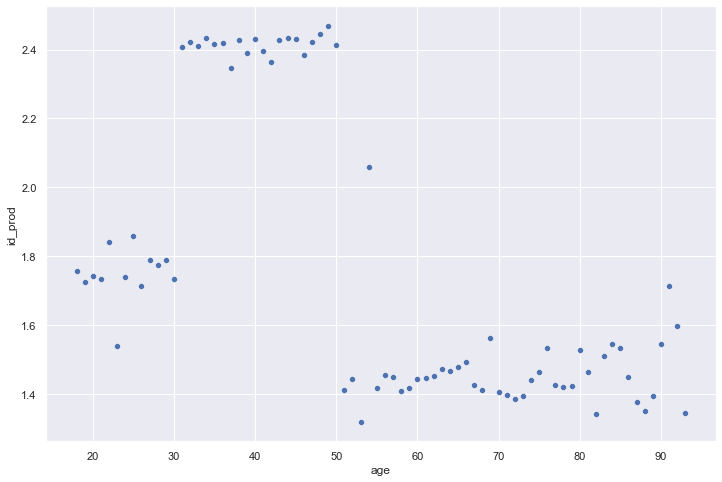

In [111]:
sns.set(rc = {'figure.figsize':(12,8)})

sns.scatterplot(data=df_panier, x="age", y="id_prod")

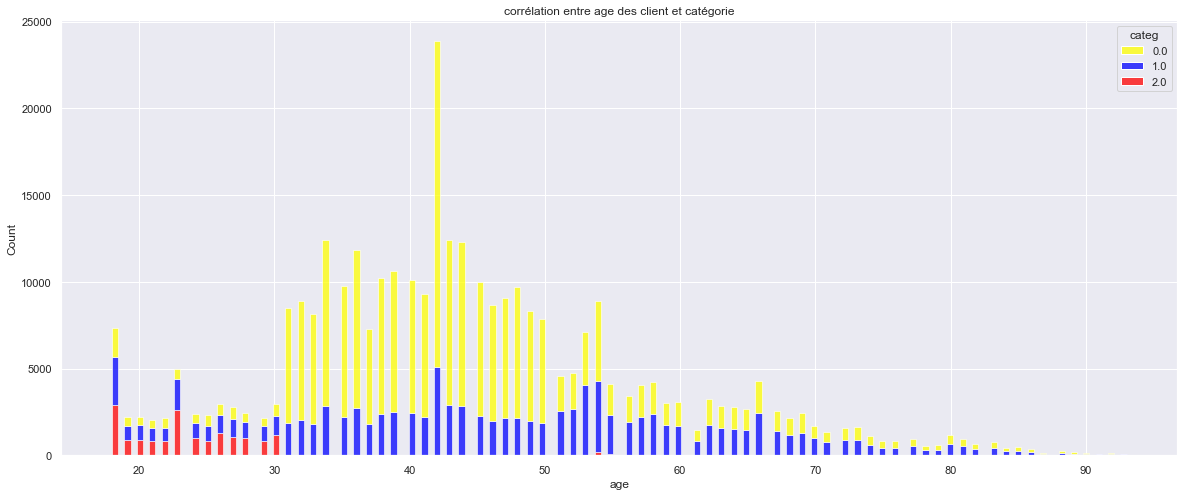

In [112]:
#Les catégories de produits achetés.
plt.figure(figsize=(20,8))
sns.histplot(data=df_general, x='age', hue='categ', palette=["yellow", "blue", "red"], multiple = 'stack')
plt.title('corrélation entre age des client et catégorie')
plt.show()